# AI Project 1 Group 1
## Skyler Hunsinger, Ella Lambert, Jaztin Marasigan
Our group decided to work on the first problem. The weighted graph representing local travel times.

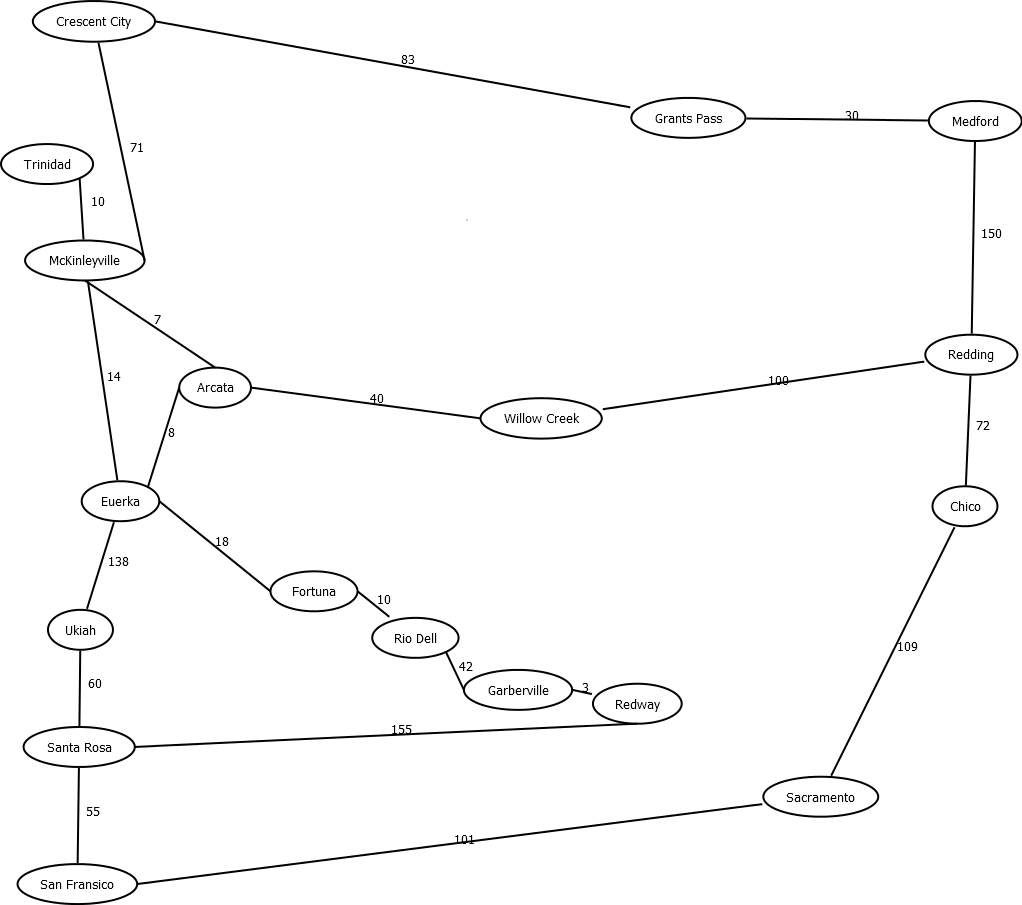


First, we implemented the weighted graph as an adjacency list.

In [1]:
humboldt_cities = {
    "Crescent City": [("Trinidad", 71), ("Grants Pass", 83)],
    "Trinidad": [("Crescent City", 71), ("McKinleyville", 10)],
    "McKinleyville": [("Trinidad", 10), ("Arcata", 7), ("Eureka", 14)],
    "Arcata": [("McKinleyville", 7), ("Eureka", 8), ("Willow Creek", 40)],
    "Eureka": [("McKinleyville", 14), ("Arcata", 8), ("Fortuna", 18), ("Ukiah", 138)],
    "Fortuna": [("Eureka", 18), ("Rio Dell", 10)],
    "Rio Dell": [("Fortuna", 10), ("Garberville", 42)],
    "Garberville": [("Rio Dell", 42), ("Redway", 3)],
    "Redway": [("Garberville", 3), ("Santa Rosa", 155), ("Sacramento", 155)],
    "Santa Rosa": [("Ukiah", 60), ("San Francisco", 55), ("Redway", 155)],
    "San Francisco": [("Santa Rosa", 55), ("Sacramento", 101)],
    "Ukiah": [("Eureka", 138), ("Santa Rosa", 60)],
    "Willow Creek": [("Arcata", 40), ("Redding", 100)],
    "Redding": [("Willow Creek", 100), ("Chico", 72), ("Medford", 150)],
    "Chico": [("Redding", 72), ("Sacramento", 109)],
    "Sacramento": [("Chico", 109), ("San Francisco", 101), ("Redway", 155)],
    "Grants Pass": [("Crescent City", 83), ("Medford", 30)],
    "Medford": [("Grants Pass", 30), ("Redding", 150)]
}

## Define our search algorithms
Next we will define all five of our search algorithms. All five algorithms will be defined as functions taking two input, the start node and end node. and will output the name of the search used, the path from the start to the end nodes, the cost of said path, which nodes were explored, and whether or not the path taken was optimal.
 - BFS
 - DFS
 - UCS (lowest cost)
 - Greedy Best-First
 - A*


In [65]:
## Lets define the BFS search algorithm
#  input(graph, start node, end node)
#  output "BFS: {path taken}, cost: {cost of path}, explored nodes: {explored nodes}, path optimal? {yes/no}

def graphBFS (graph, start, end):
    # create a variable to track path cost
    pathCost = 0
    
    # create a queue and put the start node into the queue
    queue = []
    first = (start, pathCost)
    queue.append(first)

    explored = []
    
    # while theres stuff in the queue
    while(queue):
        # check if we are at goal
        if (queue[0][0] == end): 
            pathCost = queue[0][1]     # set pathcost for print
            break                      # exit loop

        # NOTE: queue[x][y]
        # x is the tuple that is in the queue, y=0 is the location name y=1 is Pathcost of said tuple
        
        # find and add adjacent nodes of front node
        if queue[0][0] in humboldt_cities:
            #print("current node:",queue[0][0])
            for neighbor, cost in humboldt_cities[queue[0][0]]:       # for each connection in the list to the location at the front of the queue
                #print(neighbor)                              # TESTING - x is from the humboldt_cities dict
                if neighbor not in [city for city, _ in explored]:                 # if that location has not been explored yet
                    appendable = (neighbor, queue[0][1]+1)   # create a tuple of the location and path cost
                    queue.append(appendable)                 # add said tuple to queue
                    #print(neighbor, "not found in explored, added to queue") # testing
                else:
                    # TESTING PURPOSES ONLY
                    porkfriedrice = 4 # ignore this line it only exists to prevent error when disabling the debug print below
                    #print(neighbor, "found in explored, NOT added to queue")
        else:
            print("ERROR. location not found")
            break
        
        exTuple = (queue[0][0], queue[0][1])
        explored.append(exTuple)    # add the item about to be dequeued to explored list
        #print("added to explored:", exTuple)
        queue.pop(0)                 # this is working as intended by removing the last item from the queue
        
        
        
    # TESTING PRINT QUEUE
    print("Q:", queue)
    print("E:", explored)
    
    # print path taken from start to end

    # print path cost
    print("path cost: ", pathCost)
    print("end of function")
    

# TESTING ENVIRONMENT

In [66]:
# testing
print("test code start")

# need to access the tuple in the dict // how do i do that in python?

#for x in humboldt_cities["Fortuna"]:
#    print(x[0], ": ", x[1])
print("\nSHOULD PRINT ERROR")
graphBFS(humboldt_cities, "Tera", "Fortuna")

print("\nSHOULD PRINT FORTUNA, cost = 0")
graphBFS(humboldt_cities, "Fortuna", "Fortuna")

print("\nSHOULD PRINT cost = 2")
graphBFS(humboldt_cities, "Ukiah", "Fortuna")

# ERROR IN COST TRACKING
# possible solution: move pathCost into the queue so that it is attached to the node
print("\nTESTING HERE")
graphBFS(humboldt_cities, "Fortuna", "Rio Dell")

# NEED TO TRACK PATH FROM START TO END

print("test code complete")

test code start

SHOULD PRINT ERROR
ERROR. location not found
Q: [('Tera', 0)]
E: []
path cost:  0
end of function

SHOULD PRINT FORTUNA, cost = 0
Q: [('Fortuna', 0)]
E: []
path cost:  0
end of function

SHOULD PRINT cost = 2
Q: [('Fortuna', 2), ('San Francisco', 2), ('Redway', 2), ('Trinidad', 3), ('Arcata', 3), ('Willow Creek', 3)]
E: [('Ukiah', 0), ('Eureka', 1), ('Santa Rosa', 1), ('McKinleyville', 2), ('Arcata', 2)]
path cost:  2
end of function

TESTING HERE
Q: [('Rio Dell', 1), ('McKinleyville', 2), ('Arcata', 2), ('Ukiah', 2)]
E: [('Fortuna', 0), ('Eureka', 1)]
path cost:  1
end of function
test code complete
